<a href="https://colab.research.google.com/github/Sumitjh26997/CSS581-ML/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW2**


For this HW we’ll use data released by the Stanford Open Policing Project (SOPP) for the state of North Carolina, available hereLinks to an external site.. It contains records of 9.6 million police stops in the state between 2000 and 2015. A related paper is here: https://5harad.com/papers/traffic-stops.pdf

Throughout this problem, report any data cleaning steps (such as dropping some rows) that you took. Also report any ambiguities you encountered and how you resolved them.

## **Data Loading and Random Sampling**

Since the dataset being loaded is very large, we are going to randomly sample 1,000,000 rows from the dataset for our analysis. This might lead to results that do not align with the overall trend seen in the wider data, but this is just a function of the data being sampled.

In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.utils.random import sample_without_replacement

data = pd.read_csv("NC-clean.csv.gz", compression='gzip', low_memory=False)
data.head(10)

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,search_basis,officer_id,drugs_related_stop,ethnicity,district
0,NC-2000-000001,NC,2000-01-01,00:01,NaN,NaN,NaN,Unknown,NC State Highway Patrol,M,...,Search Incident to Arrest,Incident to Arrest,False,Arrest,True,NaN,NaN,NaN,N,NaN
1,NC-2000-000002,NC,2000-01-01,00:01,NaN,NaN,NaN,Unknown,NC State Highway Patrol,M,...,NaN,NaN,False,Written Warning,False,NaN,NaN,NaN,N,NaN
2,NC-2000-000003,NC,2000-01-01,00:01,NaN,NaN,NaN,Unknown,NC State Highway Patrol,F,...,NaN,NaN,False,Written Warning,False,NaN,NaN,NaN,N,NaN
3,NC-2000-000004,NC,2000-01-01,00:02,NaN,NaN,NaN,Unknown,NC State Highway Patrol,F,...,NaN,NaN,False,Citation,False,NaN,NaN,NaN,N,NaN
4,NC-2000-000005,NC,2000-01-01,00:02,NaN,NaN,NaN,Unknown,NC State Highway Patrol,F,...,NaN,NaN,False,No Action,False,NaN,NaN,NaN,N,NaN
5,NC-2000-000006,NC,2000-01-01,00:02,NaN,NaN,NaN,Unknown,NC State Highway Patrol,M,...,Consent,Consent,False,Citation,False,Observation Suspected Contraband,NaN,NaN,N,NaN
6,NC-2000-000007,NC,2000-01-01,00:05,NaN,NaN,NaN,Unknown,NC State Highway Patrol,F,...,NaN,NaN,False,Written Warning,False,NaN,NaN,NaN,N,NaN
7,NC-2000-000008,NC,2000-01-01,00:05,NaN,NaN,NaN,Unknown,NC State Highway Patrol,M,...,NaN,NaN,False,Written Warning,False,NaN,NaN,NaN,N,NaN
8,NC-2000-000009,NC,2000-01-01,00:05,NaN,NaN,NaN,Unknown,NC State Highway Patrol,M,...,NaN,NaN,False,Citation,False,NaN,NaN,NaN,N,NaN
9,NC-2000-000010,NC,2000-01-01,00:05,NaN,NaN,NaN,Unknown,NC State Highway Patrol,M,...,NaN,NaN,False,Citation,False,NaN,NaN,NaN,N,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9558084 entries, 0 to 9558083
Data columns (total 27 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   state                  object 
 2   stop_date              object 
 3   stop_time              object 
 4   location_raw           object 
 5   county_name            object 
 6   county_fips            float64
 7   fine_grained_location  object 
 8   police_department      object 
 9   driver_gender          object 
 10  driver_age_raw         float64
 11  driver_age             float64
 12  driver_race_raw        object 
 13  driver_race            object 
 14  violation_raw          object 
 15  violation              object 
 16  search_conducted       bool   
 17  search_type_raw        object 
 18  search_type            object 
 19  contraband_found       bool   
 20  stop_outcome           object 
 21  is_arrested            bool   
 22  search_basis      

In [4]:
resampled_data = data.sample(n=1000000, random_state = 42)
resampled_data.head(5)

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,search_basis,officer_id,drugs_related_stop,ethnicity,district
2071087,NC-2004-071406,NC,2004-03-03,NaN,E4,Forsyth County,37067.0,WINSTON SALEM,NC State Highway Patrol,F,...,NaN,NaN,False,Citation,False,NaN,10607,NaN,N,E4
3990192,NC-2008-195265,NC,2008-04-10,NaN,B2,Sampson County,37163.0,NaN,NC State Highway Patrol,F,...,NaN,NaN,False,Citation,False,NaN,10303,NaN,N,B2
5050121,NC-2009-580025,NC,2009-11-19,NaN,F2,NaN,NaN,NaN,NC State Highway Patrol,M,...,NaN,NaN,False,Citation,False,NaN,21323,NaN,N,F2
4458735,NC-2008-663808,NC,2008-12-24,NaN,D6,Randolph County,37151.0,asheboro,NC State Highway Patrol,F,...,NaN,NaN,False,Citation,False,NaN,10654,NaN,N,D6
8040542,NC-2013-472450,NC,2013-08-24,NaN,Durham,Durham County,37063.0,NaN,NC State Highway Patrol,M,...,NaN,NaN,False,Written Warning,False,NaN,21549,NaN,H,C7


In [5]:
resampled_data = resampled_data.reset_index()
resampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   index                  1000000 non-null  int64  
 1   id                     1000000 non-null  object 
 2   state                  1000000 non-null  object 
 3   stop_date              1000000 non-null  object 
 4   stop_time              36599 non-null    object 
 5   location_raw           964571 non-null   object 
 6   county_name            517024 non-null   object 
 7   county_fips            517024 non-null   float64
 8   fine_grained_location  98130 non-null    object 
 9   police_department      1000000 non-null  object 
 10  driver_gender          1000000 non-null  object 
 11  driver_age_raw         1000000 non-null  float64
 12  driver_age             999760 non-null   float64
 13  driver_race_raw        1000000 non-null  object 
 14  driver_race        

## **Stop rates**
### **Part A**

Using the SOPP dataset.  For each possible group defined by race, age, gender where:
race is one of “Asian”, “Black”, “Hispanic”, “White”
age is one of the buckets 15–19, 20–29, 30–39, 40–49, and 50+.
gender is one of “female”, “male”
   - Report the percentage of the Arrested (`is_arrested`) per each category, where percentage is calculated based on the total number of samples from that category. For example if 10 Asian drivers are arrested and there are 100 Asian drivers in the SOPP dataset, the percentage would be 10%.

Let's start by looking at the no. of arrests in our data

In [6]:
resampled_data.is_arrested.value_counts(dropna=False).sort_values(ascending=False)

False    986406
True      13594
Name: is_arrested, dtype: int64

There are 13,594 arrests out of the 1,000,000 stops randomly sampled in the data i.e. 1.35% of total stops. Let's analyze these in terms of race, gender and age

In [7]:
resampled_data.driver_race.value_counts(dropna=False).sort_values(ascending=False)

White       661444
Black       236489
Hispanic     68604
Other        25674
Asian         7789
Name: driver_race, dtype: int64

In [8]:
total_drivers_race = resampled_data.driver_race.value_counts()
total_arrested_drivers_race = resampled_data.loc[resampled_data.is_arrested == True].driver_race.value_counts()

driver_race_percentage = total_arrested_drivers_race/total_drivers_race
driver_race_percentage

White       0.011112
Black       0.016060
Hispanic    0.029299
Other       0.014723
Asian       0.007446
Name: driver_race, dtype: float64

In [9]:
driver_race_percentage.index

Index(['White', 'Black', 'Hispanic', 'Other', 'Asian'], dtype='object')

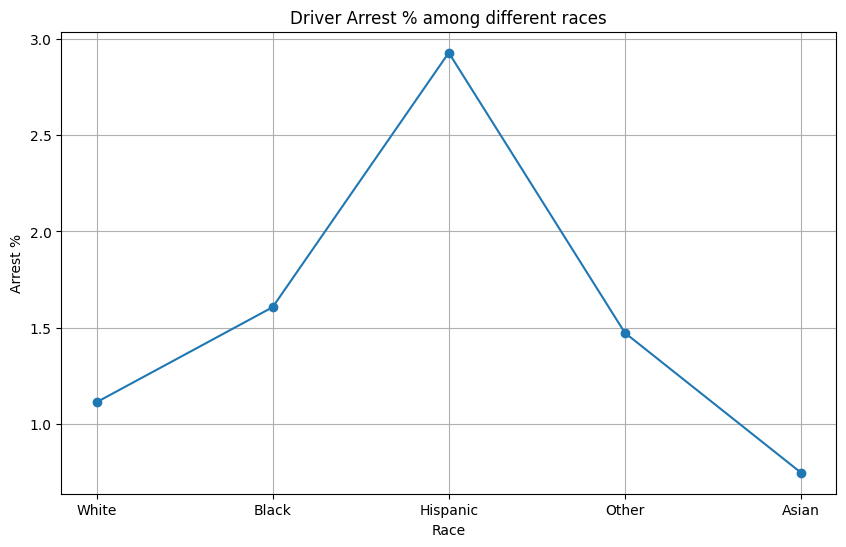

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
labels = driver_race_percentage.index

plt.plot(labels, driver_race_percentage * 100, marker='o')

plt.title('Driver Arrest % among different races')
plt.xlabel('Race')
plt.ylabel('Arrest %')

plt.grid(True)
plt.show()

The data shows that Hispanic drivers when stopped are more likely to be arrested at 2.9% almolst twice as likely as Black drivers at 1.6% and almost 3 times more likely as White drivers at 1.1%. Asian drivers the least likely to be arrested with only 0.8% of the drivers being arrested post stops.


**Percentages** <br>

**White: 1.111%** <br>
**Black: 1.606%** <br>
**Hispanic: 2.929%** <br>
**Other: 1.472%** <br>
**Asian: 0.745%** <br>

In [11]:
resampled_data.driver_age.value_counts(dropna=False).sort_values(ascending=False)

21.0    36121
20.0    35712
22.0    35541
19.0    34177
23.0    33870
        ...  
95.0        9
99.0        7
96.0        5
97.0        5
98.0        3
Name: driver_age, Length: 86, dtype: int64

In [12]:
resampled_data.driver_age.isnull().sum()

240

There are 240 NULL values in age. Let's replace these values with the mean age plus or minus standard deviation

In [13]:
# Assuming df is your DataFrame and "age" is your column of interest
mean = resampled_data['driver_age'].mean()
std = resampled_data['driver_age'].std()

# Get the number of null values
num_nulls = resampled_data['driver_age'].isnull().sum()

# Generate random values within one standard deviation of the mean
random_ages = np.random.randint(mean - std, mean + std, size=num_nulls)

# Replace null values with the generated random values
resampled_data['driver_age'][np.isnan(resampled_data['driver_age'])] = random_ages

<ipython-input-13-c97b5bf85064>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resampled_data['driver_age'][np.isnan(resampled_data['driver_age'])] = random_ages


In [14]:
resampled_data.driver_age.isnull().sum()

0

In [15]:
resampled_data.driver_age.value_counts(dropna=False).sort_values(ascending=False)

21.0    36130
20.0    35712
22.0    35550
19.0    34177
23.0    33876
        ...  
95.0        9
99.0        7
96.0        5
97.0        5
98.0        3
Name: driver_age, Length: 85, dtype: int64

In [16]:
# Define the boundaries of your age buckets
bins = [0, 15, 20, 30, 40, 50, 120]

# Create labels for your age buckets
labels = ['<15', '15-19', '20-29', '30-39', '40-49', '50+']

# Create a new column 'age_bucket' in df
resampled_data['driver_age_bucket'] = pd.cut(resampled_data['driver_age'], bins=bins, labels=labels, include_lowest=True, right=False)
resampled_data.head(5)

,index,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,...,search_type,contraband_found,stop_outcome,is_arrested,search_basis,officer_id,drugs_related_stop,ethnicity,district,driver_age_bucket
0,2071087,NC-2004-071406,NC,2004-03-03,NaN,E4,Forsyth County,37067.0,WINSTON SALEM,NC State Highway Patrol,...,NaN,False,Citation,False,NaN,10607,NaN,N,E4,30-39
1,3990192,NC-2008-195265,NC,2008-04-10,NaN,B2,Sampson County,37163.0,NaN,NC State Highway Patrol,...,NaN,False,Citation,False,NaN,10303,NaN,N,B2,15-19
2,5050121,NC-2009-580025,NC,2009-11-19,NaN,F2,NaN,NaN,NaN,NC State Highway Patrol,...,NaN,False,Citation,False,NaN,21323,NaN,N,F2,30-39
3,4458735,NC-2008-663808,NC,2008-12-24,NaN,D6,Randolph County,37151.0,asheboro,NC State Highway Patrol,...,NaN,False,Citation,False,NaN,10654,NaN,N,D6,30-39
4,8040542,NC-2013-472450,NC,2013-08-24,NaN,Durham,Durham County,37063.0,NaN,NC State Highway Patrol,...,NaN,False,Written Warning,False,NaN,21549,NaN,H,C7,20-29


In [17]:
total_drivers_age = resampled_data.driver_age_bucket.value_counts()
total_arrested_drivers_age = resampled_data.loc[resampled_data.is_arrested == True].driver_age_bucket.value_counts()

driver_age_percentage = total_arrested_drivers_age/total_drivers_age
driver_age_percentage

20-29    0.016652
30-39    0.015235
40-49    0.013532
50+      0.008239
15-19    0.009071
<15           NaN
Name: driver_age_bucket, dtype: float64

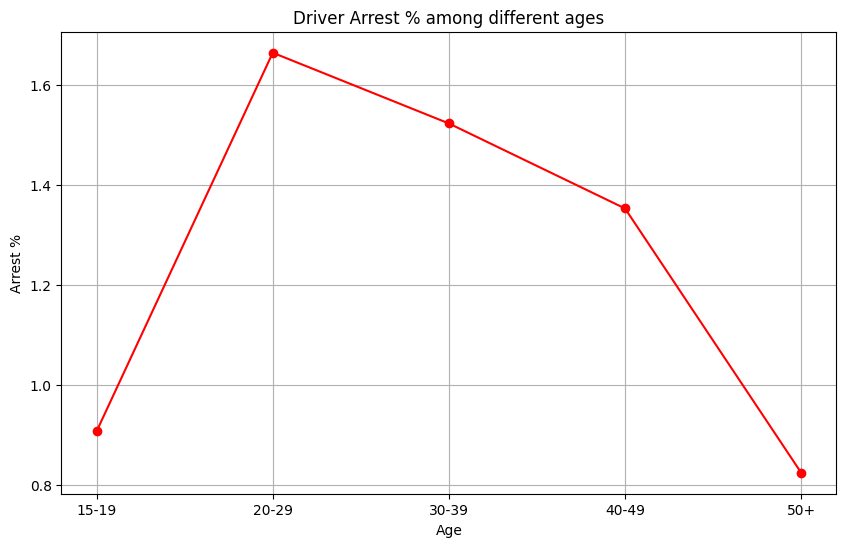

In [18]:
import matplotlib.pyplot as plt

# Define the order of labels
labels_order = ['<15', '15-19', '20-29', '30-39', '40-49', '50+']

# Arrange the Series by this order of labels
driver_age_percentage = driver_age_percentage.reindex(labels_order)

plt.figure(figsize=(10,6))
labels = driver_age_percentage.index

plt.plot(labels, driver_age_percentage * 100, marker='o', color='red')

plt.title('Driver Arrest % among different ages')
plt.xlabel('Age')
plt.ylabel('Arrest %')

plt.grid(True)
plt.show()

Per the data and graph arrests are most likely in the 20-29 age demographic at ~1.7% of stops resulting in arrests. The trend of arrests decreases as the demographic goes up with 50+ aged drivers having the lowest arrest% at 0.5%.

**Percentages**<br>

**15-19: 0.907%** <br>
**20-29: 1.665%** <br>
**30-39: 1.524%** <br>
**40-49: 1.353%** <br>
**50+: 0.824%**   <br>

In [19]:
resampled_data.driver_gender.value_counts(dropna=False).sort_values(ascending=False)

M    669475
F    330525
Name: driver_gender, dtype: int64

In [20]:
total_drivers_gender = resampled_data.driver_gender.value_counts()
total_arrested_drivers_gender = resampled_data.loc[resampled_data.is_arrested == True].driver_gender.value_counts()

driver_gender_percentage = total_arrested_drivers_gender/total_drivers_gender
driver_gender_percentage

M    0.016776
F    0.007149
Name: driver_gender, dtype: float64

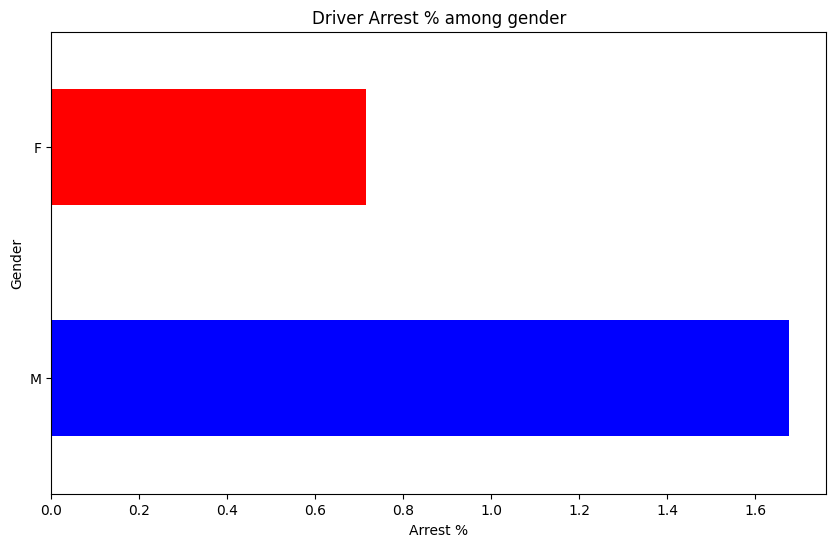

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
labels = driver_gender_percentage.index

# plt.plot(labels, driver_gender_percentage * 100, marker='o', color='green')


(driver_gender_percentage * 100).plot.barh(color=['blue', 'red'])

plt.title('Driver Arrest % among gender')
plt.ylabel('Gender')
plt.xlabel('Arrest %')

plt.show()

With gender we see that men at **1.6%** are twice as likely to be arrested than women at **0.8%**

**Percentages**

**Men: 1.677%** <br>
**Women: 0.715%** <br>

<br><br><br>



### **Part B**

For each variable age, gender and race, describe(in words) what type of technique you think will be a better choice to transform the data from categorical value to numerical.

There are several encoding techniques for converting categorical data to numerical. We'll discuss how each of the variables can be converted:

1. **Race:** The data in the `driver_race` column is one of 'White', 'Black', 'Hispanic', 'Other', or 'Asian'. Since this data is nominal i.e. categorical data with no natural priority or ordering, one-hot encoding would be a good choice. With one-hot encoding, a new column will be created for each category, set to 1 if the original value was infact that category or 0.

2. **Age:** Here for age we are considering the buckets created above, the values contained here are '<15', '15-19', '20-29', '30-39', '40-49' and '50+'. This data can be considered as ordinal i.e. having a natural ordering, and hence ordinal encoding would be the best fit here. A unique integer value will be assigned to each value based on the order, <15 = 0, 15-19 = 1 and so on.

3. **Gender:** Since this only contains 2 values 'M' and 'F', a simple label encoder can be used here i.e., assigning both category a value of 0 or 1. One-hot encoding could also work here as the data is nominal.


<br><br><br>

### **Part C**

- use logistic regression model to estimate the
  - probability of a search (`search_conducted`)
  - probability of arrest (`is_arrested`),
  - probability of a citation (`stop_outcome == "Citation"`)

- For each of the three outcomes, report the coefficients of race, age, and gender along with mean squared errors. Feel free to sample the data for performance reasons, but if you do, make sure that all standard errors are < 0.1.

#### **EDA**


In [22]:
resampled_data.search_conducted.value_counts()

False    992864
True       7136
Name: search_conducted, dtype: int64

In [23]:
resampled_data.describe()

,index,county_fips,driver_age_raw,driver_age
count,1.000000e+06,517024.000000,1000000.000000,1000000.000000
mean,4.773488e+06,37098.361914,35.790821,35.796410
std,2.761577e+06,56.901171,13.854659,13.845328
min,2.000000e+00,37001.000000,0.000000,15.000000
25%,2.378786e+06,37051.000000,24.000000,24.000000
50%,4.771044e+06,37097.000000,33.000000,33.000000
75%,7.165348e+06,37155.000000,45.000000,45.000000
max,9.558082e+06,37199.000000,221.000000,99.000000


In [24]:
resampled_data.search_basis.value_counts()

Erratic Suspicious Behaviour                                                         3002
Other Official Info                                                                  2349
Observation Suspected Contraband                                                     1137
Witness Observation                                                                   316
Suspicious Movement                                                                   265
Informant Tip                                                                          17
Erratic Suspicious Behaviour,Observation Suspected Contraband                          10
Other Official Info,Observation Suspected Contraband                                    4
Erratic Suspicious Behaviour,Observation Suspected Contraband,Suspicious Movement       4
Erratic Suspicious Behaviour,Suspicious Movement                                        4
Other Official Info,Suspicious Movement                                                 3
Observatio

In [25]:
resampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   index                  1000000 non-null  int64   
 1   id                     1000000 non-null  object  
 2   state                  1000000 non-null  object  
 3   stop_date              1000000 non-null  object  
 4   stop_time              36599 non-null    object  
 5   location_raw           964571 non-null   object  
 6   county_name            517024 non-null   object  
 7   county_fips            517024 non-null   float64 
 8   fine_grained_location  98130 non-null    object  
 9   police_department      1000000 non-null  object  
 10  driver_gender          1000000 non-null  object  
 11  driver_age_raw         1000000 non-null  float64 
 12  driver_age             1000000 non-null  float64 
 13  driver_race_raw        1000000 non-null  object  
 14  dri

Since the raw columns have the same data as their corresponding columns before standardization, we can drop the raw columns

In [26]:
raw_columns=['location_raw', 'driver_age_raw', 'driver_race_raw', 'violation_raw', 'search_type_raw' ]
resampled_data = resampled_data.drop(raw_columns, axis=1)
resampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   index                  1000000 non-null  int64   
 1   id                     1000000 non-null  object  
 2   state                  1000000 non-null  object  
 3   stop_date              1000000 non-null  object  
 4   stop_time              36599 non-null    object  
 5   county_name            517024 non-null   object  
 6   county_fips            517024 non-null   float64 
 7   fine_grained_location  98130 non-null    object  
 8   police_department      1000000 non-null  object  
 9   driver_gender          1000000 non-null  object  
 10  driver_age             1000000 non-null  float64 
 11  driver_race            1000000 non-null  object  
 12  violation              1000000 non-null  object  
 13  search_conducted       1000000 non-null  bool    
 14  sea

In [27]:
resampled_data.drugs_related_stop.value_counts(dropna=False).sort_values(ascending=False)

NaN     999276
True       724
Name: drugs_related_stop, dtype: int64

In [28]:
resampled_data.drugs_related_stop.value_counts(dropna=False).sort_values(ascending=False)

NaN     999276
True       724
Name: drugs_related_stop, dtype: int64

Drugs related stop shows us that out of 1M arrests only 724 are drug related, in the column, most values are null, looking closely at the data suggests that NULLs represent False i.e. that the stop wasn't drug related, hence NULLs in that column will be converted to False

In [29]:
resampled_data['drugs_related_stop'] = resampled_data['drugs_related_stop'].fillna(False)
resampled_data.drugs_related_stop.value_counts(dropna=False).sort_values(ascending=False)

False    999276
True        724
Name: drugs_related_stop, dtype: int64

In [30]:
resampled_data.search_type.value_counts(dropna=False).sort_values(ascending=False)

NaN                   992864
Incident to Arrest      4801
Protective Frisk         950
Consent                  688
Probable Cause           669
Warrant                   28
Name: search_type, dtype: int64

Columns containing IDs do not contain information relevant enough to contribute to prediction, `officer_id` might i.e. a particular officer performing more routing stops - we will check it's correlation and reassess if the column is required. Additionally `stop_time` has very less coverage and can be dumped along with `fine_grained_location`

In [31]:
drop_columns=['index', 'id', 'stop_time', 'fine_grained_location']
resampled_data = resampled_data.drop(drop_columns, axis=1)
resampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   state               1000000 non-null  object  
 1   stop_date           1000000 non-null  object  
 2   county_name         517024 non-null   object  
 3   county_fips         517024 non-null   float64 
 4   police_department   1000000 non-null  object  
 5   driver_gender       1000000 non-null  object  
 6   driver_age          1000000 non-null  float64 
 7   driver_race         1000000 non-null  object  
 8   violation           1000000 non-null  object  
 9   search_conducted    1000000 non-null  bool    
 10  search_type         7136 non-null     object  
 11  contraband_found    1000000 non-null  bool    
 12  stop_outcome        1000000 non-null  object  
 13  is_arrested         1000000 non-null  bool    
 14  search_basis        7126 non-null     object  
 15 

In [32]:
resampled_data.ethnicity.value_counts(dropna=False).sort_values(ascending=False)

N    931396
H     68604
Name: ethnicity, dtype: int64

In [33]:
resampled_data.driver_age_bucket.value_counts(dropna=False).sort_values(ascending=False)

20-29    317435
30-39    235113
40-49    182673
50+      177684
15-19     87095
<15           0
Name: driver_age_bucket, dtype: int64

ethnicity and driver_age are redundant columns since we already have age_bucket and driver_race


In [34]:
resampled_data.county_fips.value_counts(dropna=False).sort_values(ascending=False)

NaN        482976
37183.0     37628
37101.0     27124
37119.0     26018
37081.0     26001
            ...  
37121.0       364
37095.0       284
37005.0       246
37041.0       197
37075.0       144
Name: county_fips, Length: 101, dtype: int64

In [35]:
resampled_data = resampled_data.drop(['ethnicity', 'driver_age'], axis=1)
resampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   state               1000000 non-null  object  
 1   stop_date           1000000 non-null  object  
 2   county_name         517024 non-null   object  
 3   county_fips         517024 non-null   float64 
 4   police_department   1000000 non-null  object  
 5   driver_gender       1000000 non-null  object  
 6   driver_race         1000000 non-null  object  
 7   violation           1000000 non-null  object  
 8   search_conducted    1000000 non-null  bool    
 9   search_type         7136 non-null     object  
 10  contraband_found    1000000 non-null  bool    
 11  stop_outcome        1000000 non-null  object  
 12  is_arrested         1000000 non-null  bool    
 13  search_basis        7126 non-null     object  
 14  officer_id          964984 non-null   object  
 15 

county_name and county_fips are related columns where county_fips is just a numeric representation of the state and county, hence we can get rid of county_name. Additionally we have to handle county_fips, search_type, search_basis, officer_id, district, age_bucket have some NULL values. Since all columns are categorical, instead of imputing we will replace the NULLs with a constant "Unknown", except for county_fips which will be replaced with 00000. If columns with majority values prove to not strongly correlated, these will be dropped.

In [36]:
resampled_data.state.value_counts()

NC    1000000
Name: state, dtype: int64

State only contains one value NC and hence won't contribute to the prediction and can't be dropped

In [37]:
resampled_data = resampled_data.drop(['county_name', 'state'], axis=1)
resampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   stop_date           1000000 non-null  object  
 1   county_fips         517024 non-null   float64 
 2   police_department   1000000 non-null  object  
 3   driver_gender       1000000 non-null  object  
 4   driver_race         1000000 non-null  object  
 5   violation           1000000 non-null  object  
 6   search_conducted    1000000 non-null  bool    
 7   search_type         7136 non-null     object  
 8   contraband_found    1000000 non-null  bool    
 9   stop_outcome        1000000 non-null  object  
 10  is_arrested         1000000 non-null  bool    
 11  search_basis        7126 non-null     object  
 12  officer_id          964984 non-null   object  
 13  drugs_related_stop  1000000 non-null  bool    
 14  district            964571 non-null   object  
 15 

In [42]:
resampled_data[['search_type', 'search_basis', 'officer_id','district' ]] = resampled_data[['search_type', 'search_basis', 'officer_id','district']].fillna(value='Unknown')
resampled_data.search_type.value_counts(dropna=False).sort_values(ascending=False)

Unknown               992864
Incident to Arrest      4801
Protective Frisk         950
Consent                  688
Probable Cause           669
Warrant                   28
Name: search_type, dtype: int64

In [38]:
resampled_data['driver_age_bucket'] = resampled_data['driver_age_bucket'].cat.add_categories(['Unknown']).fillna(value='Unknown')

In [39]:
resampled_data.driver_age_bucket.value_counts(dropna=False).sort_values(ascending=False)

20-29      317435
30-39      235113
40-49      182673
50+        177684
15-19       87095
<15             0
Unknown         0
Name: driver_age_bucket, dtype: int64

In [40]:
resampled_data['county_fips'] = resampled_data['county_fips'].fillna(value=00000.0)
resampled_data.county_fips.value_counts(dropna=False).sort_values(ascending=False)

0.0        482976
37183.0     37628
37101.0     27124
37119.0     26018
37081.0     26001
            ...  
37121.0       364
37095.0       284
37005.0       246
37041.0       197
37075.0       144
Name: county_fips, Length: 101, dtype: int64

In [41]:
resampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   stop_date           1000000 non-null  object  
 1   county_fips         1000000 non-null  float64 
 2   police_department   1000000 non-null  object  
 3   driver_gender       1000000 non-null  object  
 4   driver_race         1000000 non-null  object  
 5   violation           1000000 non-null  object  
 6   search_conducted    1000000 non-null  bool    
 7   search_type         7136 non-null     object  
 8   contraband_found    1000000 non-null  bool    
 9   stop_outcome        1000000 non-null  object  
 10  is_arrested         1000000 non-null  bool    
 11  search_basis        7126 non-null     object  
 12  officer_id          964984 non-null   object  
 13  drugs_related_stop  1000000 non-null  bool    
 14  district            964571 non-null   object  
 15 

In [43]:
resampled_data.police_department.value_counts()

NC State Highway Patrol                    989145
SHP - Motor Carrier Enforcement Section     10855
Name: police_department, dtype: int64

In [44]:
resampled_data.contraband_found.value_counts()

False    998969
True       1031
Name: contraband_found, dtype: int64

In [45]:
bckup = resampled_data.copy()

In [46]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
resampled_data[['contraband_found', 'drugs_related_stop', 'district', 'stop_date', 'police_department', 'violation', 'search_conducted', 'search_type', 'is_arrested', 'search_basis', 'officer_id']] = enc.fit_transform(resampled_data[['contraband_found', 'drugs_related_stop', 'district', 'stop_date', 'police_department', 'violation', 'search_conducted', 'search_type', 'is_arrested', 'search_basis', 'officer_id']])

In [47]:
resampled_data.officer_id.value_counts().sort_values(ascending=False)

4389.0    35016
2448.0     2448
829.0      2411
1066.0     2101
166.0      1867
          ...  
958.0         1
147.0         1
719.0         1
1242.0        1
1718.0        1
Name: officer_id, Length: 4417, dtype: int64

In [48]:
corr_data = resampled_data.copy()

In [49]:
corr_data[['driver_race', 'stop_outcome', 'driver_gender', 'is_arrested', 'driver_age_bucket']] = enc.fit_transform(corr_data[['driver_race', 'stop_outcome', 'driver_gender', 'is_arrested', 'driver_age_bucket']])

In [50]:
corr_matrix = corr_data.corr()

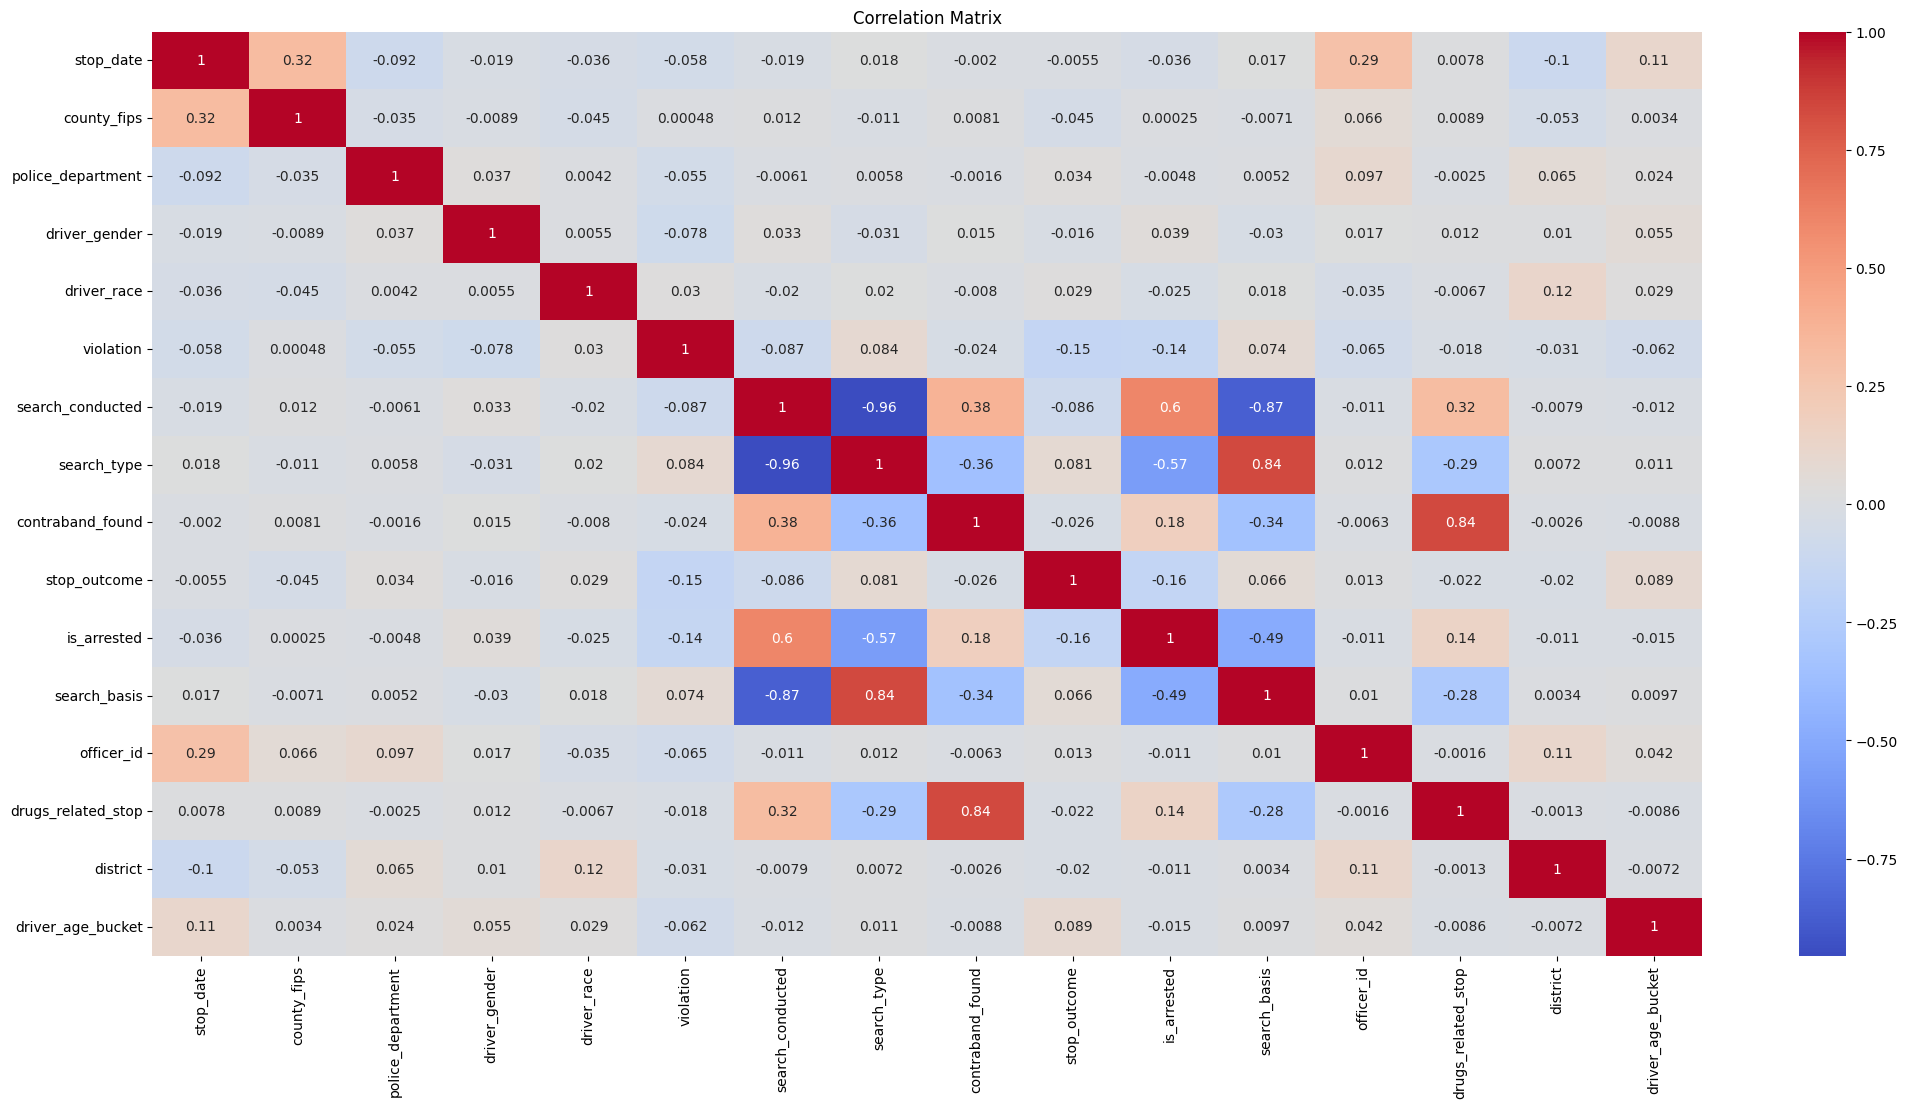

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,12))
# Assuming 'correlation_matrix' is your correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

for search condcuted, county_fips, officer_id, police_department has little to no correlation with the target variable.


In [52]:
search_data = pd.get_dummies(resampled_data, columns=['driver_race', 'driver_gender', 'driver_age_bucket'])
search_data.head(5)

,stop_date,county_fips,police_department,violation,search_conducted,search_type,contraband_found,stop_outcome,is_arrested,search_basis,...,driver_race_White,driver_gender_F,driver_gender_M,driver_age_bucket_<15,driver_age_bucket_15-19,driver_age_bucket_20-29,driver_age_bucket_30-39,driver_age_bucket_40-49,driver_age_bucket_50+,driver_age_bucket_Unknown
0,1523.0,37067.0,0.0,6.0,0.0,4.0,0.0,Citation,0.0,18.0,...,1,1,0,0,0,0,1,0,0,0
1,3022.0,37163.0,0.0,4.0,0.0,4.0,0.0,Citation,0.0,18.0,...,1,1,0,0,1,0,0,0,0,0
2,3610.0,0.0,0.0,3.0,0.0,4.0,0.0,Citation,0.0,18.0,...,1,0,1,0,0,0,1,0,0,0
3,3280.0,37151.0,0.0,6.0,0.0,4.0,0.0,Citation,0.0,18.0,...,1,1,0,0,0,0,1,0,0,0
4,4984.0,37063.0,0.0,6.0,0.0,4.0,0.0,Written Warning,0.0,18.0,...,0,0,1,0,0,1,0,0,0,0


In [53]:
column_names_list = search_data.columns.tolist()
print(column_names_list)

['stop_date', 'county_fips', 'police_department', 'violation', 'search_conducted', 'search_type', 'contraband_found', 'stop_outcome', 'is_arrested', 'search_basis', 'officer_id', 'drugs_related_stop', 'district', 'driver_race_Asian', 'driver_race_Black', 'driver_race_Hispanic', 'driver_race_Other', 'driver_race_White', 'driver_gender_F', 'driver_gender_M', 'driver_age_bucket_<15', 'driver_age_bucket_15-19', 'driver_age_bucket_20-29', 'driver_age_bucket_30-39', 'driver_age_bucket_40-49', 'driver_age_bucket_50+', 'driver_age_bucket_Unknown']


In [54]:
features = ['stop_date', 'violation', 'search_conducted',  'contraband_found', 'drugs_related_stop', 'district', 'driver_race_Asian', 'driver_race_Black', 'driver_race_Hispanic', 'driver_race_Other', 'driver_race_White', 'driver_gender_F', 'driver_gender_M', 'driver_age_bucket_<15', 'driver_age_bucket_15-19', 'driver_age_bucket_20-29', 'driver_age_bucket_30-39', 'driver_age_bucket_40-49', 'driver_age_bucket_50+']
search_data = search_data[features]
search_data.head(5)

,stop_date,violation,search_conducted,contraband_found,drugs_related_stop,district,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White,driver_gender_F,driver_gender_M,driver_age_bucket_<15,driver_age_bucket_15-19,driver_age_bucket_20-29,driver_age_bucket_30-39,driver_age_bucket_40-49,driver_age_bucket_50+
0,1523.0,6.0,0.0,0.0,0.0,35.0,0,0,0,0,1,1,0,0,0,0,1,0,0
1,3022.0,4.0,0.0,0.0,0.0,10.0,0,0,0,0,1,1,0,0,1,0,0,0,0
2,3610.0,3.0,0.0,0.0,0.0,40.0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,3280.0,6.0,0.0,0.0,0.0,30.0,0,0,0,0,1,1,0,0,0,0,1,0,0
4,4984.0,6.0,0.0,0.0,0.0,23.0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

y = search_data.search_conducted
X = search_data.drop('search_conducted', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

outcome_model = LogisticRegression()
outcome_model.fit(X_train_scaled, y_train)
y_pred = outcome_model.predict(X_test_scaled)

In [56]:
outcome_model.coef_

array([[-0.27424112, -0.86230906,  0.46404197,  0.10949972, -0.13079865,
        -0.0177128 ,  0.05434009,  0.09764186, -0.04270875, -0.08337688,
        -0.19201399,  0.19201399,  0.        , -0.09942625,  0.12252001,
         0.06654097,  0.00624682, -0.15601062]])

In [57]:
from sklearn.metrics import mean_squared_error
# Create a dictionary to store the mapping of feature names to coefficients
feature_coefficient_mapping = {}

# Get the coefficient values from the logistic_model_search
coefficients = outcome_model.coef_[0]

# Get the list of feature names from the columns of sampled_data
feature_names = X.columns

# Iterate through feature names and coefficients and create the mapping
for feature_name, coefficient in zip(feature_names, coefficients):
    feature_coefficient_mapping[feature_name] = coefficient

# Print the sorted mapping
for feature, coefficient in feature_coefficient_mapping.items():
    print(f"Feature: {feature}, Coefficient: {coefficient}")


print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

Feature: stop_date, Coefficient: -0.2742411222349254
Feature: violation, Coefficient: -0.8623090620579938
Feature: contraband_found, Coefficient: 0.46404196526538505
Feature: drugs_related_stop, Coefficient: 0.10949971836388216
Feature: district, Coefficient: -0.1307986531412111
Feature: driver_race_Asian, Coefficient: -0.017712802534722554
Feature: driver_race_Black, Coefficient: 0.05434008654416159
Feature: driver_race_Hispanic, Coefficient: 0.09764186019256771
Feature: driver_race_Other, Coefficient: -0.0427087509086073
Feature: driver_race_White, Coefficient: -0.08337687846906136
Feature: driver_gender_F, Coefficient: -0.19201399361023722
Feature: driver_gender_M, Coefficient: 0.19201399361023616
Feature: driver_age_bucket_<15, Coefficient: 0.0
Feature: driver_age_bucket_15-19, Coefficient: -0.09942624983351914
Feature: driver_age_bucket_20-29, Coefficient: 0.12252001107195622
Feature: driver_age_bucket_30-39, Coefficient: 0.06654097155846926
Feature: driver_age_bucket_40-49, Coeff

In [58]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'penalty': ['l1', 'l2'],
'C': [1 , 0.5, 0.1, 0.05, 0.01],
'class_weight': ['balanced', None],
'solver': ['liblinear', 'lbfgs'],
'max_iter': [100,200,300]}

random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_grid, n_iter=10, verbose=2, cv=3, random_state=42)

random_search.fit(X_train_scaled, y_train)
random_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l1, solver=liblinear; total time= 1.9min
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l1, solver=liblinear; total time=  58.8s
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l1, solver=liblinear; total time=  17.6s
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l2, solver=lbfgs; total time=   1.4s
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l2, solver=lbfgs; total time=   1.9s
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l2, solver=lbfgs; total time=   1.8s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=  35.2s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time= 1.9min
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time= 4.1min
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

LogisticRegression(C=0.5, max_iter=300, penalty='l1', solver='liblinear')

In [61]:
outcome_model = random_search.best_estimator_
outcome_model.fit(X_train_scaled, y_train)
y_pred = outcome_model.predict(X_test_scaled)

In [62]:
# Create a dictionary to store the mapping of feature names to coefficients
feature_coefficient_mapping = {}

# Get the coefficient values from the logistic_model_search
coefficients = outcome_model.coef_[0]

# Get the list of feature names from the columns of sampled_data
feature_names = X.columns

# Iterate through feature names and coefficients and create the mapping
for feature_name, coefficient in zip(feature_names, coefficients):
    feature_coefficient_mapping[feature_name] = coefficient

# Print the sorted mapping
for feature, coefficient in feature_coefficient_mapping.items():
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Feature: stop_date, Coefficient: -0.27372554355015494
Feature: violation, Coefficient: -0.861692003143494
Feature: contraband_found, Coefficient: 0.47066960065964325
Feature: drugs_related_stop, Coefficient: 0.0
Feature: district, Coefficient: -0.13030331128447617
Feature: driver_race_Asian, Coefficient: -0.023888920055489638
Feature: driver_race_Black, Coefficient: 0.020679228358601226
Feature: driver_race_Hispanic, Coefficient: 0.07773480978764126
Feature: driver_race_Other, Coefficient: -0.05450566597921612
Feature: driver_race_White, Coefficient: -0.12038251691873286
Feature: driver_gender_F, Coefficient: -0.10610454740876804
Feature: driver_gender_M, Coefficient: 0.2769167616362342
Feature: driver_age_bucket_<15, Coefficient: 0.0
Feature: driver_age_bucket_15-19, Coefficient: -0.10336588007103702
Feature: driver_age_bucket_20-29, Coefficient: 0.11444552832350677
Feature: driver_age_bucket_30-39, Coefficient: 0.05908768183618196
Feature: driver_age_bucket_40-49, Coefficient: 0.0
Fe

## Arrest

In [64]:
arrest_data = pd.get_dummies(resampled_data, columns=['driver_race', 'driver_gender', 'driver_age_bucket'])
arrest_data.head(5)

,stop_date,county_fips,police_department,violation,search_conducted,search_type,contraband_found,stop_outcome,is_arrested,search_basis,...,driver_race_White,driver_gender_F,driver_gender_M,driver_age_bucket_<15,driver_age_bucket_15-19,driver_age_bucket_20-29,driver_age_bucket_30-39,driver_age_bucket_40-49,driver_age_bucket_50+,driver_age_bucket_Unknown
0,1523.0,37067.0,0.0,6.0,0.0,4.0,0.0,Citation,0.0,18.0,...,1,1,0,0,0,0,1,0,0,0
1,3022.0,37163.0,0.0,4.0,0.0,4.0,0.0,Citation,0.0,18.0,...,1,1,0,0,1,0,0,0,0,0
2,3610.0,0.0,0.0,3.0,0.0,4.0,0.0,Citation,0.0,18.0,...,1,0,1,0,0,0,1,0,0,0
3,3280.0,37151.0,0.0,6.0,0.0,4.0,0.0,Citation,0.0,18.0,...,1,1,0,0,0,0,1,0,0,0
4,4984.0,37063.0,0.0,6.0,0.0,4.0,0.0,Written Warning,0.0,18.0,...,0,0,1,0,0,1,0,0,0,0


In [65]:
features = ['stop_date', 'violation', 'is_arrested',  'contraband_found', 'drugs_related_stop', 'district', 'driver_race_Asian', 'driver_race_Black', 'driver_race_Hispanic', 'driver_race_Other', 'driver_race_White', 'driver_gender_F', 'driver_gender_M', 'driver_age_bucket_<15', 'driver_age_bucket_15-19', 'driver_age_bucket_20-29', 'driver_age_bucket_30-39', 'driver_age_bucket_40-49', 'driver_age_bucket_50+']
arrest_data = arrest_data[features]
arrest_data.head(5)

,stop_date,violation,is_arrested,contraband_found,drugs_related_stop,district,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White,driver_gender_F,driver_gender_M,driver_age_bucket_<15,driver_age_bucket_15-19,driver_age_bucket_20-29,driver_age_bucket_30-39,driver_age_bucket_40-49,driver_age_bucket_50+
0,1523.0,6.0,0.0,0.0,0.0,35.0,0,0,0,0,1,1,0,0,0,0,1,0,0
1,3022.0,4.0,0.0,0.0,0.0,10.0,0,0,0,0,1,1,0,0,1,0,0,0,0
2,3610.0,3.0,0.0,0.0,0.0,40.0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,3280.0,6.0,0.0,0.0,0.0,30.0,0,0,0,0,1,1,0,0,0,0,1,0,0
4,4984.0,6.0,0.0,0.0,0.0,23.0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [68]:
y = arrest_data.is_arrested
X = arrest_data.drop('is_arrested', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_grid, n_iter=10, verbose=2, cv=3, random_state=42)

random_search.fit(X_train_scaled, y_train)
arrest_model = random_search.best_estimator_.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l1, solver=liblinear; total time= 1.3min
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l1, solver=liblinear; total time=   5.3s
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l1, solver=liblinear; total time=  20.9s
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l2, solver=lbfgs; total time=   1.7s
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l2, solver=lbfgs; total time=   1.4s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time= 4.9min
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=  53.0s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=14.9min
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

In [70]:
y_pred = arrest_model.predict(X_test_scaled)
# Create a dictionary to store the mapping of feature names to coefficients
feature_coefficient_mapping = {}

# Get the coefficient values from the logistic_model_search
coefficients = arrest_model.coef_[0]

# Get the list of feature names from the columns of sampled_data
feature_names = X.columns

# Iterate through feature names and coefficients and create the mapping
for feature_name, coefficient in zip(feature_names, coefficients):
    feature_coefficient_mapping[feature_name] = coefficient

# Print the sorted mapping
for feature, coefficient in feature_coefficient_mapping.items():
    print(f"Feature: {feature}, Coefficient: {coefficient}")


print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

Feature: stop_date, Coefficient: -0.34857298481427157
Feature: violation, Coefficient: -1.0375687492735823
Feature: contraband_found, Coefficient: 0.1571944709754675
Feature: drugs_related_stop, Coefficient: 0.0007480985155443094
Feature: district, Coefficient: -0.13148657506616152
Feature: driver_race_Asian, Coefficient: -0.023022864941761187
Feature: driver_race_Black, Coefficient: 0.06429396259732978
Feature: driver_race_Hispanic, Coefficient: 0.08167602974741456
Feature: driver_race_Other, Coefficient: 0.0
Feature: driver_race_White, Coefficient: -0.057582061694666106
Feature: driver_gender_F, Coefficient: -0.29363010483831326
Feature: driver_gender_M, Coefficient: 4.0189501189403816e-06
Feature: driver_age_bucket_<15, Coefficient: 0.0
Feature: driver_age_bucket_15-19, Coefficient: -0.07906282910476432
Feature: driver_age_bucket_20-29, Coefficient: 0.10080975336934311
Feature: driver_age_bucket_30-39, Coefficient: 0.039144646447805014
Feature: driver_age_bucket_40-49, Coefficient: 

## Stop Outcome = Citation


In [71]:
citation_data = pd.get_dummies(resampled_data, columns=['driver_race', 'driver_gender', 'driver_age_bucket', 'stop_outcome'])
citation_data.head(5)

,stop_date,county_fips,police_department,violation,search_conducted,search_type,contraband_found,is_arrested,search_basis,officer_id,...,driver_age_bucket_20-29,driver_age_bucket_30-39,driver_age_bucket_40-49,driver_age_bucket_50+,driver_age_bucket_Unknown,stop_outcome_Arrest,stop_outcome_Citation,stop_outcome_No Action,stop_outcome_Verbal Warning,stop_outcome_Written Warning
0,1523.0,37067.0,0.0,6.0,0.0,4.0,0.0,0.0,18.0,925.0,...,0,1,0,0,0,0,1,0,0,0
1,3022.0,37163.0,0.0,4.0,0.0,4.0,0.0,0.0,18.0,552.0,...,0,0,0,0,0,0,1,0,0,0
2,3610.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,18.0,3546.0,...,0,1,0,0,0,0,1,0,0,0
3,3280.0,37151.0,0.0,6.0,0.0,4.0,0.0,0.0,18.0,986.0,...,0,1,0,0,0,0,1,0,0,0
4,4984.0,37063.0,0.0,6.0,0.0,4.0,0.0,0.0,18.0,3787.0,...,1,0,0,0,0,0,0,0,0,1


In [72]:
features = ['stop_date', 'violation', 'stop_outcome_Citation',  'contraband_found', 'drugs_related_stop', 'district', 'driver_race_Asian', 'driver_race_Black', 'driver_race_Hispanic', 'driver_race_Other', 'driver_race_White', 'driver_gender_F', 'driver_gender_M', 'driver_age_bucket_<15', 'driver_age_bucket_15-19', 'driver_age_bucket_20-29', 'driver_age_bucket_30-39', 'driver_age_bucket_40-49', 'driver_age_bucket_50+']
citation_data = citation_data[features]
citation_data.head(5)

,stop_date,violation,stop_outcome_Citation,contraband_found,drugs_related_stop,district,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White,driver_gender_F,driver_gender_M,driver_age_bucket_<15,driver_age_bucket_15-19,driver_age_bucket_20-29,driver_age_bucket_30-39,driver_age_bucket_40-49,driver_age_bucket_50+
0,1523.0,6.0,1,0.0,0.0,35.0,0,0,0,0,1,1,0,0,0,0,1,0,0
1,3022.0,4.0,1,0.0,0.0,10.0,0,0,0,0,1,1,0,0,1,0,0,0,0
2,3610.0,3.0,1,0.0,0.0,40.0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,3280.0,6.0,1,0.0,0.0,30.0,0,0,0,0,1,1,0,0,0,0,1,0,0
4,4984.0,6.0,0,0.0,0.0,23.0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [73]:
y = citation_data.stop_outcome_Citation
X = citation_data.drop('stop_outcome_Citation', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_grid, n_iter=10, verbose=2, cv=3, random_state=42)

random_search.fit(X_train_scaled, y_train)
citation_model = random_search.best_estimator_.fit(X_train_scaled, y_train)
y_pred = citation_model.predict(X_test_scaled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l1, solver=liblinear; total time=  42.3s
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l1, solver=liblinear; total time=  25.3s
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l1, solver=liblinear; total time=  25.8s
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END C=0.5, class_weight=None, max_iter=300, penalty=l2, solver=lbfgs; total time=   1.4s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=  42.2s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   9.2s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=  16.2s
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

In [74]:
# Create a dictionary to store the mapping of feature names to coefficients
feature_coefficient_mapping = {}

# Get the coefficient values from the logistic_model_search
coefficients = citation_model.coef_[0]

# Get the list of feature names from the columns of sampled_data
feature_names = X.columns

# Iterate through feature names and coefficients and create the mapping
for feature_name, coefficient in zip(feature_names, coefficients):
    feature_coefficient_mapping[feature_name] = coefficient

# Print the sorted mapping
for feature, coefficient in feature_coefficient_mapping.items():
    print(f"Feature: {feature}, Coefficient: {coefficient}")


print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

Feature: stop_date, Coefficient: 0.026349377445687303
Feature: violation, Coefficient: 0.60695756759225
Feature: contraband_found, Coefficient: -0.09834006668722055
Feature: drugs_related_stop, Coefficient: 0.02666742652962358
Feature: district, Coefficient: 0.08370807569357963
Feature: driver_race_Asian, Coefficient: 0.0011396320967829358
Feature: driver_race_Black, Coefficient: -0.014075035422716433
Feature: driver_race_Hispanic, Coefficient: 0.10677382944707094
Feature: driver_race_Other, Coefficient: 0.039536505108517965
Feature: driver_race_White, Coefficient: -0.05779166384234667
Feature: driver_gender_F, Coefficient: 0.006774506452172835
Feature: driver_gender_M, Coefficient: -0.006774506452172617
Feature: driver_age_bucket_<15, Coefficient: 0.0
Feature: driver_age_bucket_15-19, Coefficient: 0.07072698359516834
Feature: driver_age_bucket_20-29, Coefficient: 0.11321956259362138
Feature: driver_age_bucket_30-39, Coefficient: 0.02848005590072101
Feature: driver_age_bucket_40-49, Co